 # OKC Thunder Project: Predicting Offensive Rebounds

In this notebook we will be constructing a machine learning model that can effectively predict whether a shot will be an offensive rebound or not. We will be going through the entire data science life cycle in order to uncover any hidden insights.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.options.display.max_rows =100

## Importing datasets

In [3]:
training_data_pbp = pd.read_csv('/Users/christopher/Desktop/Datasets/training_data_pbp.csv', index_col=0)
training_data_loc = pd.read_csv('/Users/christopher/Desktop/Datasets/training_data_loc.csv', index_col=0)
testing_data_pbp = pd.read_csv('/Users/christopher/Desktop/Datasets/testing_data_pbp.csv', index_col=0)
testing_data_loc = pd.read_csv('/Users/christopher/Desktop/Datasets/testing_data_loc.csv', index_col=0)
player_pos = pd.read_csv('/Users/christopher/Desktop/Datasets/player_pos_data.csv', index_col=0)
player_reb = pd.read_csv('/Users/christopher/Desktop/Datasets/player_reb_data.csv', index_col=0)

In [4]:
final_df = pd.merge(training_data_pbp,training_data_loc, how='inner', on=['playbyplayorder_id','game_id','row_type'])
final_df.columns

Index(['game_id', 'playbyplayorder_id', 'row_type', 'f.oreb', 'reboffensive',
       'rebdefensive', 'off_team_id', 'def_team_id', 'home_team_id',
       'away_team_id', 'ftmade', 'ftmissed', 'fg2made', 'fg2missed',
       'fg2attempted', 'fg3made', 'fg3missed', 'fg3attempted', 'secondchance',
       'andone', 'inbonus', 'eventdescription', 'actiondescription',
       'shooter_player_id', 'reb_player_id', 'playerid_off_player_1',
       'playerid_off_player_2', 'playerid_off_player_3',
       'playerid_off_player_4', 'playerid_off_player_5',
       'playerid_def_player_1', 'playerid_def_player_2',
       'playerid_def_player_3', 'playerid_def_player_4',
       'playerid_def_player_5', 'AtShot_loc_x_off_player_1',
       'AtShot_loc_y_off_player_1', 'AtRim_loc_x_off_player_1',
       'AtRim_loc_y_off_player_1', 'AtShot_loc_x_off_player_2',
       'AtShot_loc_y_off_player_2', 'AtRim_loc_x_off_player_2',
       'AtRim_loc_y_off_player_2', 'AtShot_loc_x_off_player_3',
       'AtShot_loc_y_

In [5]:
test_df = pd.merge(testing_data_pbp,testing_data_loc, how='inner', on=['playbyplayorder_id','game_id','row_type'])

In [6]:
final_df.head()

,game_id,playbyplayorder_id,row_type,f.oreb,reboffensive,rebdefensive,off_team_id,def_team_id,home_team_id,away_team_id,...,AtRim_loc_x_def_player_3,AtRim_loc_y_def_player_3,AtShot_loc_x_def_player_4,AtShot_loc_y_def_player_4,AtRim_loc_x_def_player_4,AtRim_loc_y_def_player_4,AtShot_loc_x_def_player_5,AtShot_loc_y_def_player_5,AtRim_loc_x_def_player_5,AtRim_loc_y_def_player_5
0,3380,665919,shot,No,0,1,25,3,25,3,...,-39.803211,-8.709652,-31.071664,-9.670843,-26.611135,-15.622551,-34.792343,-13.334990,-33.247587,-7.631263
1,2316,456069,shot,NaN,0,0,12,3,3,12,...,-32.523821,-10.419638,-36.907692,-1.053055,-40.607096,-1.978516,-4.731572,-2.828309,-7.543935,-0.956155
2,6244,1227471,shot,Yes,1,0,28,3,3,28,...,-37.106188,7.679048,-28.380909,-6.230190,-28.342733,-12.978960,-34.324679,-12.184792,-36.707621,-7.829441
3,5349,1052145,shot,No,0,1,6,3,6,3,...,-39.816112,1.075070,-41.040309,-1.819955,-41.829363,-0.947178,-34.645235,11.603169,-35.751400,10.726267
4,7411,1455880,shot,No,0,1,13,3,3,13,...,-39.600536,9.860322,-42.938472,-7.529091,-40.972923,-4.177037,-36.933542,6.399967,-43.236226,5.668759


In [7]:
final_df.columns

Index(['game_id', 'playbyplayorder_id', 'row_type', 'f.oreb', 'reboffensive',
       'rebdefensive', 'off_team_id', 'def_team_id', 'home_team_id',
       'away_team_id', 'ftmade', 'ftmissed', 'fg2made', 'fg2missed',
       'fg2attempted', 'fg3made', 'fg3missed', 'fg3attempted', 'secondchance',
       'andone', 'inbonus', 'eventdescription', 'actiondescription',
       'shooter_player_id', 'reb_player_id', 'playerid_off_player_1',
       'playerid_off_player_2', 'playerid_off_player_3',
       'playerid_off_player_4', 'playerid_off_player_5',
       'playerid_def_player_1', 'playerid_def_player_2',
       'playerid_def_player_3', 'playerid_def_player_4',
       'playerid_def_player_5', 'AtShot_loc_x_off_player_1',
       'AtShot_loc_y_off_player_1', 'AtRim_loc_x_off_player_1',
       'AtRim_loc_y_off_player_1', 'AtShot_loc_x_off_player_2',
       'AtShot_loc_y_off_player_2', 'AtRim_loc_x_off_player_2',
       'AtRim_loc_y_off_player_2', 'AtShot_loc_x_off_player_3',
       'AtShot_loc_y_

In [8]:
final_df.describe()

,game_id,playbyplayorder_id,reboffensive,rebdefensive,off_team_id,def_team_id,home_team_id,away_team_id,ftmade,ftmissed,...,AtRim_loc_x_def_player_3,AtRim_loc_y_def_player_3,AtShot_loc_x_def_player_4,AtShot_loc_y_def_player_4,AtRim_loc_x_def_player_4,AtRim_loc_y_def_player_4,AtShot_loc_x_def_player_5,AtShot_loc_y_def_player_5,AtRim_loc_x_def_player_5,AtRim_loc_y_def_player_5
count,372181.000000,3.721810e+05,372181.000000,372181.000000,372181.000000,372181.000000,372181.000000,372181.000000,372181.000000,372181.000000,...,317925.000000,317925.000000,332390.000000,332390.000000,317923.000000,317923.000000,332364.000000,332364.000000,317904.000000,317904.000000
mean,3784.528899,7.447173e+05,0.129394,0.365921,15.487309,15.511222,15.554072,15.444458,0.094731,0.027497,...,-34.219480,0.044044,-33.119187,-0.018784,-34.239677,0.027898,-33.172804,0.017015,-34.277768,0.059857
std,2225.381278,4.370645e+05,0.335636,0.481688,8.695267,8.701088,8.736286,8.659571,0.292843,0.163528,...,9.171986,8.286150,9.290236,8.382956,9.286942,8.121335,9.333034,8.312591,9.348138,8.086318
min,8.000000,1.379000e+03,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-59.288192,-30.452126,-57.602724,-28.198951,-60.393892,-31.773478,-57.736320,-30.101631,-57.493184,-33.895028
25%,1851.000000,3.646810e+05,0.000000,0.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,...,-39.819392,-5.233501,-39.148024,-6.047186,-39.817679,-5.039845,-39.199010,-5.966001,-39.856591,-4.968870
50%,3751.000000,7.387610e+05,0.000000,0.000000,16.000000,16.000000,16.000000,16.000000,0.000000,0.000000,...,-36.950569,-0.046144,-35.602615,-0.092843,-36.996828,-0.067130,-35.687635,-0.051025,-37.074314,-0.029486
75%,5729.000000,1.126984e+06,0.000000,1.000000,23.000000,23.000000,23.000000,23.000000,0.000000,0.000000,...,-31.248142,5.240181,-28.979649,6.005701,-31.380402,5.055831,-29.096787,6.009494,-31.467370,5.044285
max,7689.000000,1.509509e+06,1.000000,1.000000,30.000000,30.000000,30.000000,30.000000,1.000000,1.000000,...,52.559625,31.102884,52.716348,30.815825,52.961279,32.744080,54.134398,32.615971,54.254353,33.034915


In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372181 entries, 0 to 372180
Data columns (total 75 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   game_id                    372181 non-null  int64  
 1   playbyplayorder_id         372181 non-null  int64  
 2   row_type                   372181 non-null  object 
 3   f.oreb                     184347 non-null  object 
 4   reboffensive               372181 non-null  int64  
 5   rebdefensive               372181 non-null  int64  
 6   off_team_id                372181 non-null  int64  
 7   def_team_id                372181 non-null  int64  
 8   home_team_id               372181 non-null  int64  
 9   away_team_id               372181 non-null  int64  
 10  ftmade                     372181 non-null  int64  
 11  ftmissed                   372181 non-null  int64  
 12  fg2made                    372181 non-null  int64  
 13  fg2missed                  37

## Data Wrangling

### Dealing with Missing Values

In regards to the 'training_data_pbp' dataset most of the missing values were in columns 'f.oreb' and 'reb_player_id'. After much data exploration I was able to find out the reason for missing data within the target variable. There where missing data points because there was neither a offensive or defense rebound, which means the play resulted in a scoring shot. This can be seen below by filtering with columns 'eventdescription'. This can also be confirmed by subsetting the data with rows of missing values and successful field goals. 

In [10]:
training_data_pbp[training_data_pbp['f.oreb'].isnull()]['eventdescription'].head(20)

2      Made Shot
7      Made Shot
9      Made Shot
10     Made Shot
12     Made Shot
13     Made Shot
15     Made Shot
16    Free Throw
17     Made Shot
18     Made Shot
19     Made Shot
20     Made Shot
21    Free Throw
22     Made Shot
23     Made Shot
24     Made Shot
26    Free Throw
28     Made Shot
31     Made Shot
34     Made Shot
Name: eventdescription, dtype: object

In [11]:
training_data_pbp[['f.oreb','reboffensive','rebdefensive','ftmade','fg2made', 'fg3made' ]].head(10)

,f.oreb,reboffensive,rebdefensive,ftmade,fg2made,fg3made
1,No,0,1,0,0,0
2,NaN,0,0,0,1,0
3,Yes,1,0,0,0,0
4,No,0,1,0,0,0
5,No,0,1,0,0,0
6,No,0,1,0,0,0
7,NaN,0,0,0,1,0
8,No,0,1,0,0,0
9,NaN,0,0,0,1,0
10,NaN,0,0,0,1,0


In the above subsetted data frame we can see that any of the missing data within our target variable was a result of a successful shot. 

There also appears to be missing data within the 'reb_player_id', 20556 missing values to be exact. Similarly, to the missing data in our target column this is also a result of a successful shot. Within the missing data for 'reb_player_id' there also appears to be 20580 plays that have missed shots/rebounds but no player id. 

In [12]:
print('Missing values in \'reb_player_id\':',training_data_pbp['reb_player_id'].isnull().sum())

Missing values in 'reb_player_id': 205556


In [13]:
training_data_pbp[training_data_pbp['reb_player_id'].isnull()][['eventdescription', 'actiondescription', 'rebdefensive', 'reboffensive']]

,eventdescription,actiondescription,rebdefensive,reboffensive
2,Made Shot,Cutting Layup Shot,0,0
7,Made Shot,Dunk Shot,0,0
9,Made Shot,Tip Shot,0,0
10,Made Shot,Driving Layup Shot,0,0
12,Made Shot,Step Back Jump shot,0,0
...,...,...,...,...
372173,Made Shot,Putback Layup Shot,0,0
372176,Missed Shot,Tip Layup Shot,0,1
372177,Free Throw,Free Throw 2 of 2,0,0
372178,Made Shot,Jump Shot,0,0


In [14]:
training_data_pbp[(training_data_pbp['reb_player_id'].isnull()) & (training_data_pbp['eventdescription'] == 'Missed Shot')][['rebdefensive', 'reboffensive']].count()

rebdefensive    20580
reboffensive    20580
dtype: int64

## Exploratory Data Analysis

In the following section I will be exploring the datasets with the use of charts and graphs. This will help uncover any hidden insights otherwise not seen.

### Distribution of Target Variable

Text(0, 0.5, '# of plays')

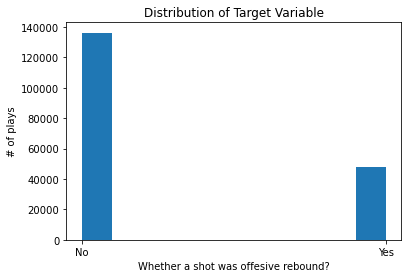

In [15]:
training_data_pbp['f.oreb'].hist(grid=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Whether a shot was offesive rebound?')
plt.ylabel('# of plays')

In the above chart we can see that the classes in our target variable are severely imbalanced. This is because offensive rebounds are much more difficult to attain as opposed to defensive rebounds. Teams on offense are focused on scoring and teams on defense are trying to get the basketball back. This issue will have to be addressed before feeding our data in a machine learning model.

### Which actions/plays resulted in most of the offensive rebounds?
In the chart below we can see that a 'jump shot' resulted in most of the offensive rebounds. Followed by actions 'layup shot', and a 'driving layup shot'. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

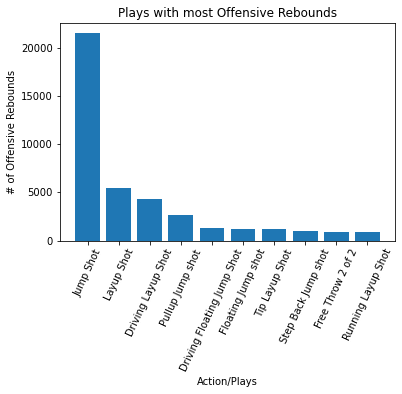

In [16]:
ro_actions = training_data_pbp.groupby('actiondescription')['reboffensive'].sum().reset_index()
ro_actions = ro_actions.sort_values(by='reboffensive', ascending=False)
plt.bar(ro_actions['actiondescription'][:10],ro_actions['reboffensive'][:10])
plt.xlabel('Action/Plays')
plt.ylabel('# of Offensive Rebounds')
plt.title('Plays with most Offensive Rebounds')
plt.xticks(rotation=65)

### Will a team being in the bonus affect offensive rebounds?

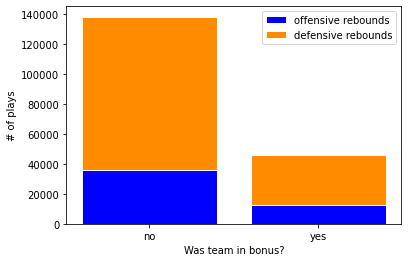

In [17]:
ro_inbonus = training_data_pbp.groupby('inbonus')[['reboffensive','rebdefensive']].sum().reset_index()
plt.bar(ro_inbonus['inbonus'],ro_inbonus['reboffensive'], color='blue', edgecolor='white')
plt.bar(ro_inbonus['inbonus'], ro_inbonus['rebdefensive'], color='darkorange', bottom=ro_inbonus['reboffensive'], edgecolor='white')
plt.xlabel('Was team in bonus?')
plt.ylabel('# of plays')
r = [0,1]
names = ['no', 'yes']
plt.xticks(r,names)
plt.legend(labels=['offensive rebounds', 'defensive rebounds'])
plt.show()

In [18]:
ro_inbonus['oreb_pct'] = ro_inbonus['reboffensive'] / ro_inbonus['rebdefensive'] * 100
ro_inbonus

,inbonus,reboffensive,rebdefensive,oreb_pct
0,0,35734,102462,34.875368
1,1,12424,33727,36.836956


From my perspective, I would assume that a team that is in the bonus would be more inclined to go after offensive rebounds. This is because any other fouls committed by the team on defense would most likely result in a free throw. Although this can vary from game situations to different coaching styles. After plotting the chart and comparing percentages of offensive rebounds with and without 'in bonus' there does appear to be small difference. With a team who is in the bonus having slightly higher offensive rebounds. These assumptions have not been statistically tested and are not conclusive, we will look to further explore this.

### Which position gets the most offensive rebounds?

In the chart below we were interested in looking at which position on the court gets the most offensive rebounds. The position with the most offensive rebounds turned out to be position 5, followed closely by position 4. There appears the be a sudden drop off for those in position 1-3. This could be because they play further away from the basket. 

In [19]:
## joining player position and player rebound datasets
players = pd.merge(player_pos, player_reb, how='inner', on='player_id')

Text(0.5, 1.0, 'Position with most offensive rebounds')

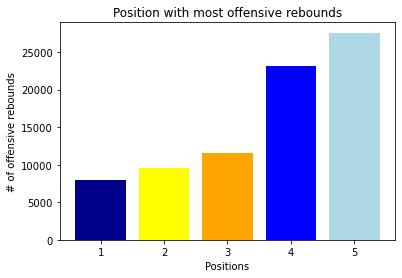

In [20]:
ply = players.groupby(['position'])['off_rebs'].sum().reset_index()
plt.bar(ply['position'], ply['off_rebs'], color=['darkblue', 'yellow', 'orange', 'blue', 'lightblue'] )
plt.xlabel('Positions')
plt.ylabel('# of offensive rebounds')
plt.title('Position with most offensive rebounds')

### What happens to missed final free throws?
After our filtering below of the dataset it appears that a defensive rebound is likely to occur after a missed free throw.  

In [21]:
## Checking on offensive and defensive rebounds stats if final ft is missed
final_df[(final_df['row_type'] == 'final ft') & (final_df['ftmissed'] == 1)].agg({'reboffensive':['sum'], 'rebdefensive':['sum']})

,reboffensive,rebdefensive
sum,1150,9056


## Feature Engineering

In [22]:
## create flag column for target variable null values, might help with predictions

#final_df['flag'] = np.where(final_df['f.oreb'].isnull(), 0, 1)
#final_df[['flag','f.oreb']].head()

In [23]:
## extra points on second chance 
final_df['extrafg2'] = np.where((final_df['secondchance'] > 0) & (final_df['fg2made'] == 1), 1, 0)
final_df['extrafg3'] = np.where((final_df['secondchance'] > 0) & (final_df['fg3made'] == 1), 1, 0)

In [24]:
final_df[['secondchance','fg2made','fg3made','extrafg2', 'extrafg3']].tail()

,secondchance,fg2made,fg3made,extrafg2,extrafg3
372176,0,0,0,0,0
372177,0,0,1,0,0
372178,0,1,0,0,0
372179,2,0,0,0,0
372180,0,0,0,0,0


## Machine Learning

### Preprocessing

Any missing values in our target variable were filled with 'No'. This is because the missing values were scored shots which equate to no rebounds.

#### Handling Missing Values

In [25]:
final_df['f.oreb'].fillna('No', inplace=True)
final_df.drop(columns=['reb_player_id','reboffensive', 'rebdefensive'], axis=1, inplace=True)
## dropping rows with missing player location
final_df.dropna(inplace=True)

In [26]:
final_df.head()

,game_id,playbyplayorder_id,row_type,f.oreb,off_team_id,def_team_id,home_team_id,away_team_id,ftmade,ftmissed,...,AtShot_loc_x_def_player_4,AtShot_loc_y_def_player_4,AtRim_loc_x_def_player_4,AtRim_loc_y_def_player_4,AtShot_loc_x_def_player_5,AtShot_loc_y_def_player_5,AtRim_loc_x_def_player_5,AtRim_loc_y_def_player_5,extrafg2,extrafg3
0,3380,665919,shot,No,25,3,25,3,0,0,...,-31.071664,-9.670843,-26.611135,-15.622551,-34.792343,-13.334990,-33.247587,-7.631263,0,0
1,2316,456069,shot,No,12,3,3,12,0,0,...,-36.907692,-1.053055,-40.607096,-1.978516,-4.731572,-2.828309,-7.543935,-0.956155,0,0
2,6244,1227471,shot,Yes,28,3,3,28,0,0,...,-28.380909,-6.230190,-28.342733,-12.978960,-34.324679,-12.184792,-36.707621,-7.829441,0,0
3,5349,1052145,shot,No,6,3,6,3,0,0,...,-41.040309,-1.819955,-41.829363,-0.947178,-34.645235,11.603169,-35.751400,10.726267,0,0
4,7411,1455880,shot,No,13,3,3,13,0,0,...,-42.938472,-7.529091,-40.972923,-4.177037,-36.933542,6.399967,-43.236226,5.668759,0,0


In [27]:
final_df.isnull().sum()

game_id                      0
playbyplayorder_id           0
row_type                     0
f.oreb                       0
off_team_id                  0
def_team_id                  0
home_team_id                 0
away_team_id                 0
ftmade                       0
ftmissed                     0
fg2made                      0
fg2missed                    0
fg2attempted                 0
fg3made                      0
fg3missed                    0
fg3attempted                 0
secondchance                 0
andone                       0
inbonus                      0
eventdescription             0
actiondescription            0
shooter_player_id            0
playerid_off_player_1        0
playerid_off_player_2        0
playerid_off_player_3        0
playerid_off_player_4        0
playerid_off_player_5        0
playerid_def_player_1        0
playerid_def_player_2        0
playerid_def_player_3        0
playerid_def_player_4        0
playerid_def_player_5        0
AtShot_l

In [28]:
## encoding target variables 
def encode_target(targets):
  if targets == 'No':
    return 0
  else:
    return 1

final_df['f.oreb'] = final_df['f.oreb'].apply(encode_target)
final_df['f.oreb']

0         0
1         0
2         1
3         0
4         0
         ..
372174    1
372175    1
372177    0
372178    0
372179    0
Name: f.oreb, Length: 317869, dtype: int64

#### Upsampling Minority Class

Due to our severe class imbalance, we will be upsampling the minority class ['f.oreb' = 'yes'] with replacement. Other methods such as downsampling majority class and SMOTE were tested. Upsampling was chosen because of its resulting log loss.

In [29]:
final_df['f.oreb'].value_counts()

0    270982
1     46887
Name: f.oreb, dtype: int64

In [30]:
no_ofr = final_df[final_df['f.oreb'] == 0]
yes_ofr = final_df[final_df['f.oreb'] == 1]

yes_ofr_new = yes_ofr.sample(270982, replace=True)
training_data_equal = pd.concat([no_ofr, yes_ofr_new], axis=0)

In [31]:
training_data_equal['f.oreb'].value_counts()

1    270982
0    270982
Name: f.oreb, dtype: int64

#### Splitting data into training and testing sets

In [32]:
### One-hot encoding categorical features
X = training_data_equal.drop(columns=['f.oreb'])
X = pd.get_dummies(X, drop_first=True, dtype=int)

y = training_data_equal['f.oreb']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=95)

### Feature Selection
 As a result of our one-hot encoding our number of features has increased. In order to select the best features we will be using 'mutual information', a measure of dependency between two variables.

In [34]:
### new feature selection using mutual information
from sklearn.feature_selection import SelectKBest, mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k=20)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 0.007195
Feature 1: 0.331105
Feature 2: 0.001922
Feature 3: 0.002056
Feature 4: 0.003458
Feature 5: 0.000852
Feature 6: 0.000909
Feature 7: 0.000000
Feature 8: 0.158131
Feature 9: 0.097183
Feature 10: 0.021379
Feature 11: 0.049659
Feature 12: 0.012538
Feature 13: 0.005133
Feature 14: 0.000405
Feature 15: 0.001070
Feature 16: 0.002247
Feature 17: 0.005449
Feature 18: 0.003156
Feature 19: 0.002881
Feature 20: 0.003196
Feature 21: 0.001536
Feature 22: 0.002987
Feature 23: 0.003556
Feature 24: 0.002631
Feature 25: 0.002719
Feature 26: 0.002581
Feature 27: 0.001848
Feature 28: 0.326421
Feature 29: 0.325081
Feature 30: 0.324744
Feature 31: 0.326205
Feature 32: 0.324712
Feature 33: 0.328336
Feature 34: 0.325043
Feature 35: 0.327102
Feature 36: 0.324667
Feature 37: 0.327038
Feature 38: 0.325651
Feature 39: 0.326749
Feature 40: 0.324135
Feature 41: 0.326490
Feature 42: 0.327870
Feature 43: 0.325449
Feature 44: 0.325363
Feature 45: 0.325360
Feature 46: 0.326566
Feature 47: 0.326176
Fe

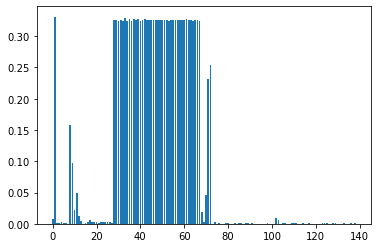

In [35]:
import matplotlib.pyplot as plt
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Model Selection

In order to compare different models we will first be constructing a baseline model.

#### Baseline Model

In [36]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, log_loss

dclf = DummyClassifier(strategy='stratified')
dclf.fit(X_train_fs,y_train)
y_pred = dclf.predict(X_test_fs)
print('Training Score:',dclf.score(X_train_fs,y_train))
print('Testing Score',dclf.score(X_test_fs, y_test))

Training Score: 0.49931202454569895
Testing Score 0.4997970354880374


In [37]:
print(f1_score(y_test,y_pred, average='macro'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(log_loss(y_test, y_pred))

0.49943251168735164
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     81445
           1       0.50      0.50      0.50     81145

    accuracy                           0.50    162590
   macro avg       0.50      0.50      0.50    162590
weighted avg       0.50      0.50      0.50    162590

[[40749 40696]
 [40691 40454]]
17.289131772369856


#### RandomForestClassifier

In [38]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=1000, random_state=8)
rdf.fit(X_train_fs, y_train)
print('Training Score:',rdf.score(X_train_fs,y_train))
print('Testing Score',rdf.score(X_test_fs, y_test))
y_pred = rdf.predict(X_test_fs)

Training Score: 1.0
Testing Score 0.9906513315702072


In [39]:
print(f1_score(y_test,y_pred, average='macro'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(log_loss(y_test, y_pred))

0.9906503895804906
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     81445
           1       1.00      0.98      0.99     81145

    accuracy                           0.99    162590
   macro avg       0.99      0.99      0.99    162590
weighted avg       0.99      0.99      0.99    162590

[[81351    94]
 [ 1426 79719]]
0.3228920307671003


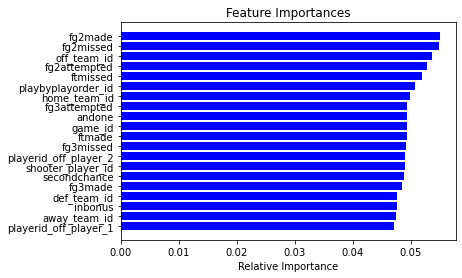

In [58]:
## checking out top features
features = X.columns
importances = rdf.feature_importances_
indices = np.argsort(importances)[-22:]  
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Selection Summary 

### Best Model

The best performing model was a RandomForestClassifier in regards to lowest log loss. Our baseline model scored a 17.22 log loss while our RandomForestClassifier scored 0.31. The RandomForestClassifier was also able to separate classes very well as depicted in the confusion matrix. It only miscategorized about 2000 plays. According to its feature importance method, the top features appear to be 'ftmissed','away_team_id','off_team_id','fg2attempted', and 'fg2missed'.

### Test Dataset Preprocessing/Predictions

In [41]:
test_final_df = pd.merge(testing_data_pbp,testing_data_loc, how='inner', on=['playbyplayorder_id','game_id','row_type'])
test_final_df

,game_id,playbyplayorder_id,row_type,off_team_id,def_team_id,home_team_id,away_team_id,ftmade,ftmissed,fg2made,...,AtRim_loc_x_def_player_3,AtRim_loc_y_def_player_3,AtShot_loc_x_def_player_4,AtShot_loc_y_def_player_4,AtRim_loc_x_def_player_4,AtRim_loc_y_def_player_4,AtShot_loc_x_def_player_5,AtShot_loc_y_def_player_5,AtRim_loc_x_def_player_5,AtRim_loc_y_def_player_5
0,5838,1148157,shot,1,3,1,3,0,0,1,...,-36.878749,2.680759,-41.757861,2.991644,-44.129938,3.194080,-37.731367,-1.639577,-39.011371,-0.852890
1,4902,964867,final ft,8,3,8,3,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6918,1359847,shot,11,3,11,3,0,0,0,...,-38.516950,-11.168972,-41.163969,9.194310,-41.410059,11.241852,-40.045804,-5.085559,-41.101181,-6.267949
3,1429,281709,shot,28,3,3,28,0,0,1,...,9.755953,-11.753311,12.906682,11.131408,10.458029,9.113076,24.833774,-5.532949,23.542835,-7.571050
4,6007,1181434,shot,7,3,3,7,0,0,0,...,-38.339847,-19.392559,-38.670049,8.444717,-39.077093,4.966785,-38.637160,1.757705,-38.902638,1.904237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390545,5328,1048274,shot,8,6,8,6,0,0,1,...,-40.358642,1.493798,-41.267826,-5.370144,-40.932118,-4.029585,-37.547693,7.903340,-39.717293,9.632035
390546,5328,1048280,shot,8,6,8,6,0,0,1,...,7.693642,2.768366,-35.276162,-3.438405,-37.592596,-2.978077,41.028927,23.267083,40.572849,24.054167
390547,5328,1048277,shot,8,6,8,6,0,0,1,...,-41.724562,1.043684,-39.727941,-11.436462,-40.431147,-13.090692,-38.983063,13.610871,-39.071090,12.833796
390548,5328,1048286,shot,8,6,8,6,0,0,0,...,-21.375181,2.795747,-35.692949,-10.965589,-35.892293,-10.485047,-20.319924,-14.183525,-18.250516,-12.351125


In [42]:
##removing missing values
test_final_df.dropna(inplace=True)
test_final_df.isnull().sum()

game_id                      0
playbyplayorder_id           0
row_type                     0
off_team_id                  0
def_team_id                  0
home_team_id                 0
away_team_id                 0
ftmade                       0
ftmissed                     0
fg2made                      0
fg2missed                    0
fg2attempted                 0
fg3made                      0
fg3missed                    0
fg3attempted                 0
secondchance                 0
andone                       0
inbonus                      0
eventdescription             0
actiondescription            0
shooter_player_id            0
playerid_off_player_1        0
playerid_off_player_2        0
playerid_off_player_3        0
playerid_off_player_4        0
playerid_off_player_5        0
playerid_def_player_1        0
playerid_def_player_2        0
playerid_def_player_3        0
playerid_def_player_4        0
playerid_def_player_5        0
AtShot_loc_x_off_player_1    0
AtShot_l

In [43]:
## create similar columns from training set
test_final_df['extrafg2'] = np.where((test_final_df['secondchance'] > 0) & (test_final_df['fg2made'] == 1), 1, 0)
test_final_df['extrafg3'] = np.where((test_final_df['secondchance'] > 0) & (test_final_df['fg3made'] == 1), 1, 0)

In [44]:
## one-hot encoding for categorical variables 
X_test2 = pd.get_dummies(test_final_df, drop_first=True, dtype=int)
X_test2.shape

(332953, 139)

In [45]:
X_test2

,game_id,playbyplayorder_id,off_team_id,def_team_id,home_team_id,away_team_id,ftmade,ftmissed,fg2made,fg2missed,...,actiondescription_Step Back Jump shot,actiondescription_Tip Dunk Shot,actiondescription_Tip Layup Shot,actiondescription_Tip Shot,actiondescription_Turnaround Bank Hook Shot,actiondescription_Turnaround Bank shot,actiondescription_Turnaround Fadeaway Bank Jump Shot,actiondescription_Turnaround Fadeaway shot,actiondescription_Turnaround Hook Shot,actiondescription_Turnaround Jump Shot
0,5838,1148157,1,3,1,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6918,1359847,11,3,11,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1429,281709,28,3,3,28,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6007,1181434,7,3,3,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6918,1359972,11,3,11,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390545,5328,1048274,8,6,8,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
390546,5328,1048280,8,6,8,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
390547,5328,1048277,8,6,8,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
390548,5328,1048286,8,6,8,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
## feature selection using 'selectkbest' from training set

#from sklearn.feature_selection import SelectKBest, mutual_info_classif
#fs = SelectKBest(score_func=mutual_info_classif, k=20)
#fs.fit(X_train, y_train)
X_test2_fs = fs.transform(X_test2)

In [47]:
rdf.classes_

array([0, 1])

In [48]:
prob_class_1 = rdf.predict_proba(X_test2_fs)[:, 1]
print(prob_class_1)

pbp = X_test2['playbyplayorder_id']

[0.305 0.243 0.131 ... 0.238 0.156 0.374]


In [49]:
data_dict = {'playbyplayorder_id':pbp,'off_reb_pct':prob_class_1}

testing_predictions = pd.DataFrame(data_dict)
testing_predictions

,playbyplayorder_id,off_reb_pct
0,1148157,0.305
2,1359847,0.243
3,281709,0.131
4,1181434,0.288
5,1359972,0.333
...,...,...
390545,1048274,0.307
390546,1048280,0.164
390547,1048277,0.238
390548,1048286,0.156


In [59]:
testing_predictions.to_csv('testing_predictions.csv',index=False,header=True)

## Other models

In [51]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(scoring='neg_log_loss')
lr.fit(X_train_fs, y_train)
y_pred = lr.predict(X_test_fs)
print("Training Loss: {:.3f}".format(lr.score(X_train_fs, y_train)))
print("Test Loss: {:.3f}".format(lr.score(X_test_fs, y_test)))

Training Loss: -0.692
Test Loss: -0.692


In [52]:
print(f1_score(y_test,y_pred, average='weighted'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(log_loss(y_test, y_pred))

0.49682739173713275
              precision    recall  f1-score   support

           0       0.54      0.30      0.38     81445
           1       0.51      0.75      0.61     81145

    accuracy                           0.52    162590
   macro avg       0.53      0.52      0.50    162590
weighted avg       0.53      0.52      0.50    162590

[[24233 57212]
 [20453 60692]]
16.498553510541328


In [53]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(eval_metric='Logloss')
cb.fit(X_train_fs, y_train)
y_pred = cb.predict(X_test_fs)
print("Training Loss: {:.3f}".format(cb.score(X_train_fs, y_train)))
print("Test Loss: {:.3f}".format(cb.score(X_test_fs, y_test)))

Learning rate set to 0.130076
0:	learn: 0.6912586	total: 131ms	remaining: 2m 10s
1:	learn: 0.6896572	total: 198ms	remaining: 1m 38s
2:	learn: 0.6882978	total: 288ms	remaining: 1m 35s
3:	learn: 0.6870550	total: 352ms	remaining: 1m 27s
4:	learn: 0.6860486	total: 410ms	remaining: 1m 21s
5:	learn: 0.6850930	total: 469ms	remaining: 1m 17s
6:	learn: 0.6843656	total: 539ms	remaining: 1m 16s
7:	learn: 0.6835992	total: 599ms	remaining: 1m 14s
8:	learn: 0.6829365	total: 656ms	remaining: 1m 12s
9:	learn: 0.6823445	total: 711ms	remaining: 1m 10s
10:	learn: 0.6818897	total: 782ms	remaining: 1m 10s
11:	learn: 0.6813441	total: 832ms	remaining: 1m 8s
12:	learn: 0.6809293	total: 888ms	remaining: 1m 7s
13:	learn: 0.6804681	total: 936ms	remaining: 1m 5s
14:	learn: 0.6800397	total: 984ms	remaining: 1m 4s
15:	learn: 0.6795997	total: 1.04s	remaining: 1m 4s
16:	learn: 0.6792237	total: 1.09s	remaining: 1m 3s
17:	learn: 0.6788852	total: 1.16s	remaining: 1m 3s
18:	learn: 0.6784835	total: 1.22s	remaining: 1m 2s


In [54]:
print(f1_score(y_test,y_pred, average='weighted'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(log_loss(y_test, y_pred))

0.6776316927979097
              precision    recall  f1-score   support

           0       0.69      0.64      0.67     81445
           1       0.67      0.71      0.69     81145

    accuracy                           0.68    162590
   macro avg       0.68      0.68      0.68    162590
weighted avg       0.68      0.68      0.68    162590

[[52400 29045]
 [23307 57838]]
11.121208230110856


In [55]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric='logloss')
xg.fit(X_train_fs, y_train)
y_pred = xg.predict(X_test_fs)
print("Training Loss: {:.3f}".format(xg.score(X_train_fs, y_train)))
print("Test Loss: {:.3f}".format(xg.score(X_test_fs, y_test)))

Training Loss: 0.684
Test Loss: 0.649


In [56]:
print(f1_score(y_test,y_pred, average='weighted'))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(log_loss(y_test, y_pred))

0.6486524753398571
              precision    recall  f1-score   support

           0       0.67      0.60      0.63     81445
           1       0.64      0.70      0.67     81145

    accuracy                           0.65    162590
   macro avg       0.65      0.65      0.65    162590
weighted avg       0.65      0.65      0.65    162590

[[48956 32489]
 [24504 56641]]
12.107106594477239
